<a id='start'></a>
# Pandas DataFrame

In questo notebook vengono spiegati i principali metodi per raccogliere ed effettuare una prima manipolazione sui dati. <br>
La libreria più usata per effettuare queste operazioni principali è **Pandas**. <br>
<br>
Il notebook è suddiviso nelle seguenti sezioni:<br>
- [DataFrame e Series](#section1)<a href='#section1'></a>; <br>
- [Importare i dati dall'esterno](#section2)<a href='#section2'></a>; <br>
- [Selezionare i dati del dataset](#section3)<a href='#section3'></a>; <br>
    - [Index - based Selection](#section4)<a href='#section4'></a><br>
    - [Label - based Selection](#section5)<a href='#section5'></a> <br>
    - [Conditional Selection](#section6)<a href='#section6'></a>
- [Analisi esplorativa dei dati](#section7)<a href='#section7'></a>
    - [Statistica Descrittiva](#descr_stats)<a href='#descr_stats'></a> <br>
    - [Esplorare la distribuzione dei dati](#expl_data_distri)<a href='#expl_data_distri'></a>

<a id='section1'></a>
## DataFrame e Series

Introduciamo la libreria **Pandas**, utilizzata per creare e gestire gli oggetti: **Dataframe**.<br>

Gli oggetti *Series* e *Dataframe* possono essere importati da file (csv, xls, html, ..) oppure creati manualmente. <br>

Importiamo inizialmente la libreria Pandas

In [2]:
import pandas as pd

Un **DataFrame** è una tabella che contiene un array di singole voci, ognuna delle quali ha un certo valore. Ogni voce corrisponde ad una riga (o record) e ad una colonna.

In [2]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})

,Yes,No
0,50,131
1,21,2


In [3]:
pd.DataFrame([[50,21], [131, 2]], columns=['Yes', 'No'])

,Yes,No
0,50,21
1,131,2


Un DataFrame può contenere anche caratteri stringa e non solo valori numerici

In [3]:
pd.DataFrame({'Audi': ['Migliore', 'Peggiore'], 'Mercedes': ['Peggiore', 'Migliore']})

,Audi,Mercedes
0,Migliore,Peggiore
1,Peggiore,Migliore


Le righe di un DataFrame prendono il nome di **Index** ed è possibile assegnargli un valore tramite il seguente codice:

In [4]:
pd.DataFrame({'Audi': ['Migliore', 'Peggiore'], 'Mercedes':['Peggiore', 'Migliore']}, index = ['Utilitaria', 'Sportiva'])

,Audi,Mercedes
Utilitaria,Migliore,Peggiore
Sportiva,Peggiore,Migliore


Una **Series**, è una sequenza di valori di dati. Se un DataFrame è una tabella, una serie è una lista.

In [5]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

È possibile assegnare dei valori alle righe di una Series allo stesso modo di prima, utilizzando un parametro indice. <br>
Inoltre, una Series non ha un nome di colonna, ma ha solo un nome complessivo

In [6]:
pd.Series([300, 450, 400], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product X')

2015 Sales    300
2016 Sales    450
2017 Sales    400
Name: Product X, dtype: int64

<a id='section2'></a>
## Importare i dati dall'esterno

In questa sezione del notebook ci occupiamo di come importare i dati da risorse esterne (csv, excel e html) grazie alla libreria Pandas.

### Importare dati da un csv

Il metodo da utilizzare per importare i dati da un csv con la libreria Pandas è __[read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)__. <br>
Ci sono molti parametri per il metodo *read_csv*, i più importanti sono:
- sep
- delimeter
- header
- index_col
- skiprows
- na_values <br>
...

In [4]:
dataset = pd.read_csv("data/dataset.csv", index_col=0)
dataset

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0
6,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,S,0
7,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1


In [8]:
# Il metodo .head() permette di vedere le prime righe (di default le prime 5) di un DataFrame o di una Series
dataset.head()

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0


In [9]:
# il metodo .tail() permette di vedere le ultime righe (di default le prime 5) di un DataFrame o di una Series
dataset.tail()

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
16,3,"Rice, Master. Eugene",male,2.0,29.125,Q,0
17,2,"Williams, Mr. Charles Eugene",male,NaN,13.000,S,1
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,18.000,S,0
19,3,"Masselmani, Mrs. Fatima",female,NaN,7.225,C,1
20,2,"Fynney, Mr. Joseph J",male,35.0,26.000,S,0


### Importare dati da un file excel

Il metodo da utilizzare per importare i dati da un file excel con la libreria Pandas è __[read_excel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html)__. <br>
In questo caso sarà necessario indicare in quale sheet del file excel si trova il dataframe che vogliamo importare utilizzando il parametro *sheet_name*.

In [10]:
dataset = pd.read_excel("data/dataset_excel_workbook.xlsx", engine='openpyxl', sheet_name='dataset', index_col=0)
dataset

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0
6,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,S,0
7,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1


### Importare dati da un sito web

Il metodo da utilizzare per importare una tabella da un sito web con la libreria Pandas è __[read_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html#pandas.read_html)__. <br>


I parametri più importanti da considerare nel momento in cui si fa l'import sono i seguenti: <br>
- **skiprows** = indica il numero di righe da saltare nell'importazione; <br>
- **header** = indica la riga da utilizzare per creare le intestazioni delle colonne.

In [11]:
classifica_serie_a = pd.read_html(io="http://www.legaseriea.it/it/serie-a/classifica", skiprows=1, header=0)
classifica_serie_a

[             SQUADRE  PUNTI   G   V   N   P  G.1  V.1  N.1  P.1  G.2  V.2  \
 0           1  Milan     63  29  19   6   4   15    9    3    3   14   10   
 1          2  Napoli     60  29  18   6   5   14    8    2    4   15   10   
 2           3  Inter     59  28  17   8   3   14   10    2    2   14    7   
 3        4  Juventus     56  29  16   8   5   14    8    3    3   15    8   
 4           5  Lazio     49  29  14   7   8   14    8    4    2   15    6   
 5        6  Atalanta     48  28  13   9   6   14    4    6    4   14    9   
 6            7  Roma     48  29  14   6   9   15    8    4    3   14    6   
 7      8  Fiorentina     46  28  14   4  10   14    9    2    3   14    5   
 8   9  Hellas Verona     41  29  11   8  10   15    8    2    5   14    3   
 9       10  Sassuolo     40  29  10  10   9   14    4    5    5   15    6   
 10        11  Torino     35  28   9   8  11   15    7    4    4   13    2   
 11       12  Bologna     33  28   9   6  13   14    6    3    5

La funzione *read_html* ritorna come oggetto una *lista di DataFrame*. <br>
Possiamo a questo punto associare la lista di Dataframe identificata dall'elemento 0 dell'oggetto ottenuto da *read_html*.

In [12]:
serie_a = classifica_serie_a[0]
serie_a.head()

,SQUADRE,PUNTI,G,V,N,P,G.1,V.1,N.1,P.1,G.2,V.2,N.2,P.2,F,S
0,1 Milan,63,29,19,6,4,15,9,3,3,14,10,3,1,55,29
1,2 Napoli,60,29,18,6,5,14,8,2,4,15,10,4,1,51,21
2,3 Inter,59,28,17,8,3,14,10,2,2,14,7,6,1,61,23
3,4 Juventus,56,29,16,8,5,14,8,3,3,15,8,5,2,45,26
4,5 Lazio,49,29,14,7,8,14,8,4,2,15,6,3,6,58,42


È possibile ottenere i nomi delle colonne che formano un Dataframe o una Series attraverso l'attributo **.columns**

In [13]:
serie_a.columns

Index(['SQUADRE', 'PUNTI', 'G', 'V', 'N', 'P', 'G.1', 'V.1', 'N.1', 'P.1',
       'G.2', 'V.2', 'N.2', 'P.2', 'F', 'S'],
      dtype='object')

In [14]:
type(serie_a)

pandas.core.frame.DataFrame

In [15]:
serie_a

,SQUADRE,PUNTI,G,V,N,P,G.1,V.1,N.1,P.1,G.2,V.2,N.2,P.2,F,S
0,1 Milan,63,29,19,6,4,15,9,3,3,14,10,3,1,55,29
1,2 Napoli,60,29,18,6,5,14,8,2,4,15,10,4,1,51,21
2,3 Inter,59,28,17,8,3,14,10,2,2,14,7,6,1,61,23
3,4 Juventus,56,29,16,8,5,14,8,3,3,15,8,5,2,45,26
4,5 Lazio,49,29,14,7,8,14,8,4,2,15,6,3,6,58,42
5,6 Atalanta,48,28,13,9,6,14,4,6,4,14,9,3,2,50,31
6,7 Roma,48,29,14,6,9,15,8,4,3,14,6,2,6,47,35
7,8 Fiorentina,46,28,14,4,10,14,9,2,3,14,5,2,7,47,37
8,9 Hellas Verona,41,29,11,8,10,15,8,2,5,14,3,6,5,54,46
9,10 Sassuolo,40,29,10,10,9,14,4,5,5,15,6,5,4,51,48


<a id='section3'></a>
## Selezionare i dati del dataset

In questa sezione impareremo i principali metodi per selezionare le colonne e le righe di un dataset, identificato sottoforma di DataFrame o Series.

Prima di continuare è necessario precisare che la libreria **Pandas** _non_ utilizza la denominazione, che viene usata comunemente per individuare gli assi di un database, ovvero *dimension* e *feature*. <br>
La libreria Pandas indica le dimensioni di una matrice, con il termine **axes**, ovvero utilizza il parametro **(axis = 0)** per indicare le righe di un dataset ed il parametro **(axis = 1)** per indicare le colonne di un dataset.

<img src="img/axis_Pandas.jpg">

In [16]:
# Rinomiamo il dataset importato precedentemente tramite file excel
titanic = dataset
titanic.head()

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0


In [17]:
# Selezioniamo la colonna Age del dataset titanic
titanic['Age'] # è possibile usare anche titanic.Age

1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
20    35.0
Name: Age, dtype: float64

Nella cella precedente abbiamo selezionato una colonna da un DataFrame ed è stata estratta assegnandole il formato **Series**. <br>
Abbiamo indicato due metodi per estrarre una colonna da un DataFrame, nessuno dei due è il migliore ma qualora il nome della colonna avesse uno spazio, ad esempio supponiamo fosse "Age Female", in quel caso dovremmo usare la notazione con le parentesi quadre.

In [18]:
# Selezioniamo ora la prima riga della colonna Age
titanic['Age'][1]

38.0

Pandas utilizza due paradigmi per selezionare i dati: <br>
- Index-based: ovvero basandosi sulla posizione numerica dei dati; <br>
- Label-based: ovvero basandosi sul valore di un indice dei dati.

<a id='section4'></a>
### Index-Based Selection

Il codice che si utilizza per effettuare una *index-based selection* è **iloc**.<br>
Ad esempio, selezioniamo la prima riga del dataset sul titanic:

In [19]:
titanic.iloc[0]

Pclass                                                      1
Name        Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                    female
Age                                                      38.0
Fare                                                  71.2833
Embarked                                                    C
Survived                                                    1
Name: 1, dtype: object

Sia il metodo **iloc** che **loc** (che vedremo dopo) sono *row-first, column-second* ovvero considerano come primo input il valore della riga e come secondo quello della colonna. Questo funzionamento è opposto al tradizionale comportamento di Python, che è *column-first, row-second*. <br>
Infatti poche righe sopra, prima di introdurre *iloc* e *loc* abbiamo usato il codice "titanic['Age'][1]", ovvero dataset[colonna][riga].

Per ottenere la colonna desiderata con iloc dobbiamo utilizzare la seguente sintassi:

In [20]:
# Stampo TUTTE le righe della colonna dei nomi
titanic.iloc[:,1]

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles Eugene
18    Vander Planke, Mrs. Julius (Emelia Maria V

In [21]:
# Stampo le prime 3 righe della colonna dei nomi
titanic.iloc[:3,1]

1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
Name: Name, dtype: object

In [22]:
# Stampo le righe che mi interessano della colonna dei nomi
# In questo caso utilizzo una lista per indicare le righe che mi interessano
titanic.iloc[[1,2,3,5,7],1]

2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
6                              McCarthy, Mr. Timothy J
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Name: Name, dtype: object

<a id='section5'></a>
### Label-Based Selection

Il codice che si utilizza per effettuare una *label-based selection* è **loc**.<br>
Per ottenere il primo record del campo "Name" del dataset sul titanic dobbiamo utilizzare la seguente sintassi:

In [23]:
titanic.loc[1, 'Name']

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [24]:
titanic.loc[2, ['Name', 'Age', 'Pclass']]

Name      Heikkinen, Miss. Laina
Age                         26.0
Pclass                         3
Name: 2, dtype: object

Quando si sceglie o si passa da *loc* a *iloc*, c'è una **differenza** che è importante tenere a mente, cioè che **i due metodi utilizzano schemi di indicizzazione leggermente diversi**.<br>

**iloc** utilizza lo schema di indicizzazione Python stdlib: dove **il primo elemento del range è incluso e l'ultimo escluso.** Quindi iloc[0:10] selezionerà le voci 0,.....,9. <br>
**loc**, nel frattempo, **indicizza in modo inclusivo.** Così loc[0:10] selezionerà le voci 0,.....,10.

Supponiamo di avere un DataFrame con un semplice elenco numerico, ad esempio 0,......1000. In questo caso df.iloc[0:1000] restituirà 1000 voci, mentre df.loc[0:1000] ne restituirà 1001! Per ottenere 1000 elementi usando loc, dovremo utilizzare df.loc[0:999].


<a id='section6'></a>
### Conditional Selection

Durante le nostre analisi potremo aver bisogno di selezionare parti di un dataset sulla base dei valori che possono assumere i campi. Ovvero voler porre delle condizioni alle nostre selezioni.

Supponiamo di voler selezionare dal dataset del titanic solo le donne; iniziamo chiedendoci quali sono le righe che hanno come campo della colonna "Sex" il valore di "female":

In [25]:
titanic.Sex == "female"

1      True
2      True
3      True
4     False
5     False
6     False
7     False
8      True
9      True
10     True
11     True
12    False
13    False
14     True
15     True
16    False
17    False
18     True
19     True
20    False
Name: Sex, dtype: bool

Abbiamo ottenuto una colonna di True/False che possiamo utilizzare con l'operatore *loc* per selezionare nel dataset i campi riferiti solo alle donne:

In [26]:
titanic.loc[titanic.Sex == "female"]

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1
11,1,"Bonnell, Miss. Elizabeth",female,58.0,26.5500,S,1
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,7.8542,S,0
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,16.0000,S,1
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,18.0000,S,0


Supponiamo ora di voler selezionare le donne che hanno meno di 30 anni:

In [27]:
# utilizziamo l'operatore logico &
titanic.loc[(titanic.Sex == "female") & (titanic.Age < 30)]

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,7.8542,S,0


Supponiamo di voler selezionare le femmine oppure tutti quelli che hanno meno di 30 anni, in questo caso sarà necessario utilizzare l'operatore **or**: |

In [28]:
titanic.loc[(titanic.Sex == "female") | (titanic.Age < 30)]

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
7,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1
11,1,"Bonnell, Miss. Elizabeth",female,58.0,26.5500,S,1
12,3,"Saundercock, Mr. William Henry",male,20.0,8.0500,S,0
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,7.8542,S,0


Pandas ha dei *conditional selector* pre-costruiti che possono essere utili durante le analisi:<br>
- **isin**: permette di selezionare i dati il cui valore è in una lista di valori; <br>
- **isnull** (ed il suo complementare **notnull**: permette di selezionare i valori che sono o meno nulli (NaN). 

Supponiamo di voler selezionare solo le persone che appartengono alla seconda e terza classe (campo Pclass).

In [29]:
titanic.loc[titanic.Pclass.isin([2,3])]

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0
7,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1
12,3,"Saundercock, Mr. William Henry",male,20.0,8.0500,S,0
13,3,"Andersson, Mr. Anders Johan",male,39.0,31.2750,S,0
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,7.8542,S,0


Supponiamo di voler selezionare tutti i passeggeri che hanno età nulla:

In [30]:
titanic.loc[titanic.Age.isnull()]

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0
17,2,"Williams, Mr. Charles Eugene",male,NaN,13.0000,S,1
19,3,"Masselmani, Mrs. Fatima",female,NaN,7.2250,C,1


A questo punto possiamo anche associare un valore ad un campo una volta effettuata una selezione. <br>
Assegniamo a tutte le persone che hanno un valore di età nullo, l'età di 35 anni.

In [31]:
titanic.loc[titanic.Age.isnull(), 'Age'] = 35
titanic

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,35.0,8.4583,Q,0
6,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,S,0
7,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1


Riprendiamo l'esempio dagli esercizi della scorsa lezione. Riprendiamo il dataset di ROOT e ripuliamo i valori che hanno valore per il campo `f_mass_jj` uguale a `-999`.

In [33]:
import uproot

treename = 'HZZ4LeptonsAnalysisReduced'
filename ='data/ntuple_4mu_bkg.root'

upfile = uproot.open(filename)
params = upfile[treename].arrays() # dictionary of NumPy arrays

VARS = ['f_massjj']

upfile = uproot.open(filename)
params = upfile[treename].arrays(VARS)

df = pd.DataFrame(params.tolist())
df

,f_massjj
0,-999.000000
1,-999.000000
2,-999.000000
3,1353.025513
4,-999.000000
...,...
58102,-999.000000
58103,-999.000000
58104,-999.000000
58105,-999.000000


In [34]:
df.dtypes

df_cleaned = df.loc[df['f_massjj'] != -999]
df_cleaned

,f_massjj
3,1353.025513
7,111.907364
28,147.763611
31,124.071999
32,777.092590
...,...
58056,114.257278
58057,106.195534
58060,53.661579
58062,71.162025


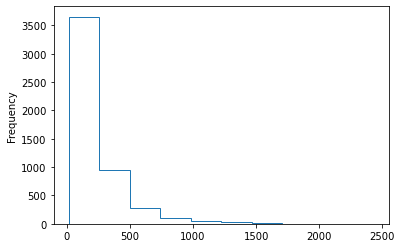

In [35]:
ax = df_cleaned['f_massjj'].plot.hist(bins=10, label='f_massjj', histtype='step')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/opt/anaconda3/envs/jupyter/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


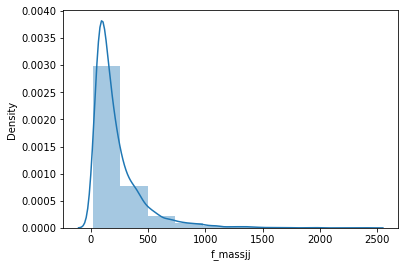

In [36]:
import seaborn as sns
ax = sns.distplot(df_cleaned['f_massjj'], bins=10, kde=True)

Di seguito alcuni link utili: <br>
- <a href='https://pandas.pydata.org/pandas-docs/stable/indexing.html'>Pandas - Indexing and Selecting Data</a><br>
- <a href='https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html'>Pandas - Comparison with Sql</a><br>

<a id='section7'></a>
## Analisi esplorativa dei dati

Carichiamo un dataset in python:

In [2]:
import pandas as pd

df = pd.read_csv("data/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Esistono altre strutture di dati oltre ai dati rettangolari.
<br>
- **Dati di serie temporali** registra misurazioni successive della stessa variabile.
<br>
- **Strutture di dati spaziali**, utilizzate nella mappatura e nell'analisi della posizione. Il focus dei dati è un oggetto (ad es. una casa) e le sue coordinate spaziali.
<br>
- **Le strutture di dati a grafo (o a rete)** vengono utilizzate per rappresentare relazioni fisiche, sociali e astratte. Ad esempio, un grafico di un social network, come Facebook o LinkedIn, può rappresentare le connessioni tra le persone della rete. Gli hub di distribuzione collegati da strade sono un esempio di rete fisica.
<br><br>
<a href='https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html'>Consulta la documentazione sui dataframe in Python</a>

<a id='descr_stats'></a>
### Statistica Descrittiva

Le statistiche descrittive sono brevi coefficienti descrittivi che riassumono un dato set di dati, che può essere una rappresentazione dell'intera o un campione di una popolazione. <br>
Le statistiche descrittive sono suddivise in: <br>
- Misure di tendenza centrale;
- Misure di variabilità.

###### Misure di tendenza centrale

Un passaggio fondamentale nell'esplorazione dei dati è ottenere un "valore tipico" per ciascuna caratteristica (variabile): *una stima di dove si trova la maggior parte dei dati (cioè, la sua **tendenza centrale**)*. <br>
- **Media**: la somma di tutti i valori divisa per il numero di valori <br>
- **Media pesata**: la somma di tutti i valori moltiplicata per un peso divisa per la somma dei pesi <br>
- **Mediana**: il valore tale che la metà dei dati si trovi al di sopra e al di sotto di <br>
- **Mediana ponderata**: il valore tale che metà della somma dei pesi si trovi al di sopra e al di sotto dei dati ordinati <br>
- **Media tagliata**: la media di tutti i valori dopo aver perso un numero fisso di valori estremi <br>

Concentrandoci sulla *media tagliata* e sulla *media ponderata*, possiamo dire: <br>
- __Media tagliata__: viene calcolata eliminando un numero fisso di valori ordinati a ciascuna estremità e quindi facendo una media dei valori rimanenti. La formula per calcolare la media tagliata con *p* valori minimo e massimo omessi è:<img src="img/TrimmedMean.png" alt="Trimmed Mean" width="300"/>  Una media trimmata elimina elimina l'infuenza dei valori estremi.

- __Media ponderata__: si calcola moltiplicando ciascun valore di dati x per un peso w e dividendo la loro somma per la somma dei pesi. La formula è la seguente: <img src="img/WeightedMean.png" alt="Weighted Mean" width="300"/>

La **mediana** è il numero centrale in un elenco ordinato di dati. La mediana è indicata come una stima robusta della posizione poiché non è influenzata da **valori anomali** (casi estremi) che potrebbero distorcere i risultati. <br>
*Un valore anomalo è qualsiasi valore molto distante dagli altri valori in un set di dati.*

In [4]:
import numpy as np
from scipy import stats

mean = df.Fare.mean()
print("Fare's mean:", round(mean,2))
print("-----------------------------")

median = df.Fare.median()
print("Fare's median:", round(median,2))

print("-----------------------------")
Fare_sort = df.Fare.sort_values()
Fare_sort = Fare_sort.reset_index(drop = True)
limit = 0.1
limits = (Fare_sort[round(df.Fare.shape[0]*limit)], Fare_sort[round(df.Fare.shape[0]*(1-limit))])
trimmed_mean = stats.tmean(Fare_sort, limits=limits)
print("Fare's trimmed mean:", round(trimmed_mean,2), "with the following limits:", limits)

print("-----------------------------")
sample = df.Fare.iloc[0:4]
print("I extract a sample from the Fare's column:\n%s" % sample)
weights = [0.25, 0.50, 0.125, 0.125]
print("I define some weights:\n", weights)
weighted_mean = np.average(sample, weights = weights)
print("Fare's weighted mean:", weighted_mean)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Fare's mean: 32.2
-----------------------------
Fare's median: 14.45
-----------------------------
Fare's trimmed mean: 21.52 with the following limits: (7.55, 77.9583)
-----------------------------
I extract a sample from the Fare's column:
0     7.2500
1    71.2833
2     7.9250
3    53.1000
Name: Fare, dtype: float64
I define some weights:
 [0.25, 0.5, 0.125, 0.125]
Fare's weighted mean: 45.082275


###### Misure di variabilità

**Variabilità**, detta anche *dispersione*, misura se i valori dei dati sono strettamente raggruppati o sparsi. <br>
Di seguito sono riportate alcune delle parole chiave utilizzate nelle misurazioni della variabilità: <br>
- __Deviazioni__: la differenza tra i valori osservati e la stima della posizione
- __Range__: la differenza tra il valore più grande e quello più piccolo in un set di dati
- __Percentile__: il valore tale che la percentuale P dei valori assume questo valore o meno e (100-P) la percentuale assume questo valore o più
- __Interquartile range__ (IQR): la differenza tra il 75° percentile e il 25° percentile. <br><br>

È possibile calcolare la variabilità con diverse misure: <br>
- __Varianza__: la somma delle deviazioni al quadrato dalla media divisa per n-1 dove n è il numero di valori dei dati
- __Deviazione standard__: la radice quadrata della varianza
- __Deviazione media assoluta__: la media del valore assoluto degli scostamenti dalla media
- __Deviazione assoluta mediana dalla mediana__: la mediana del valore assoluto degli scostamenti dalla mediana

<img src="img/Variance.png" alt="Variance" width="400"/>

<img src="img/MeanDeviation.png" alt="MeanDeviation" width="450"/>

Né la varianza, né la deviazione standard, né la deviazione media assoluta sono robuste rispetto a valori anomali e estremi.<br>
_La varianza e la deviazione standard sono particolarmente sensibili ai valori anomali poiché si basano sulle deviazioni al quadrato_.<br>
Una stima robusta della variabilità è la **deviazione assoluta mediana** dalla mediana o MAD:
<img src="img/Median.png" alt="Median" width="650"/>
dove *m* è la mediana.

Un approccio diverso alla stima della dispersione si basa sull'*osservazione della diffusione dei dati ordinati*. Le statistiche basate su dati ordinati (classificati) sono denominate **statistiche sugli ordini**. <br>
La misura più elementare è l'**intervallo**: *la differenza tra il numero più grande e quello più piccolo*. <br>
Per evitare la sensibilità ai valori anomali, possiamo esaminare l'intervallo dei dati dopo aver eliminato i valori da ciascuna estremità. Formalmente, questi tipi di stime si basano sulle differenze tra i **percentili**.

In [5]:
variance = df.Fare.var()
print("Fare's variance:", round(variance,2))
print("-----------------------------")

st_dev = df.Fare.std()
print("Fare's standard deviation:", round(st_dev,2))
print("-----------------------------")

mean_absolute_deviation = df.Fare.mad()
print("Fare's mean absolute deviation:", round(mean_absolute_deviation,2))
print("-----------------------------")


Fare's variance: 2469.44
-----------------------------
Fare's standard deviation: 49.69
-----------------------------
Fare's mean absolute deviation: 28.16
-----------------------------


In [6]:
def MAD(x):   
    median = x.median()
    deviations_from_median = []
    for i in range(x.shape[0]):
        deviation = abs(x[i] - median)
        deviations_from_median.append(deviation)

    Df = pd.DataFrame(deviations_from_median, columns=['Dev_From_Median'])
    Mad = Df.Dev_From_Median.median()

    return Mad

In [7]:
print("Median Absolute Deviation from the median:", MAD(df.Fare))

Median Absolute Deviation from the median: 6.9042


<a id='expl_data_distri'></a>
### Esplorare la distribuzione dei dati

Ciascuna delle stime che abbiamo trattato riassume i dati in un unico numero per descrivere la posizione o la variabilità dei dati. È anche utile esplorare come i dati sono distribuiti nel complesso.

<a href='https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html'>Boxplot</a> si basano su percentili e offrono un modo rapido per visualizzare la distribuzione dei dati.
![Boxplot](img/boxplot.png)
La parte superiore e inferiore della casella sono rispettivamente il 75° e il 25° percentile.
<br>
La mediana è indicata dalla linea orizzontale nel riquadro. <br>
Le linee tratteggiate, denominate **baffi**, si estendono dall'alto e dal basso per indicare l'intervallo per la maggior parte dei dati. <br>
In alcuni grafici il *baffi* ha una lunghezza pari a 1,5 volte l'altezza della scatola, data dalla distanza tra Q3 e Q1,
chiamato anche **intervallo interquartile**; ovviamente è minore se il valore massimo (o minimo) osservato è distante da Q3 (o Q1) meno di 1,5 volte l'intervallo interquartile.

{'whiskers': [<matplotlib.lines.Line2D at 0x166b53850>,
 'caps': [<matplotlib.lines.Line2D at 0x166b53eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x166b53580>],
 'medians': [<matplotlib.lines.Line2D at 0x166b763d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x166b766a0>],
 'means': []}

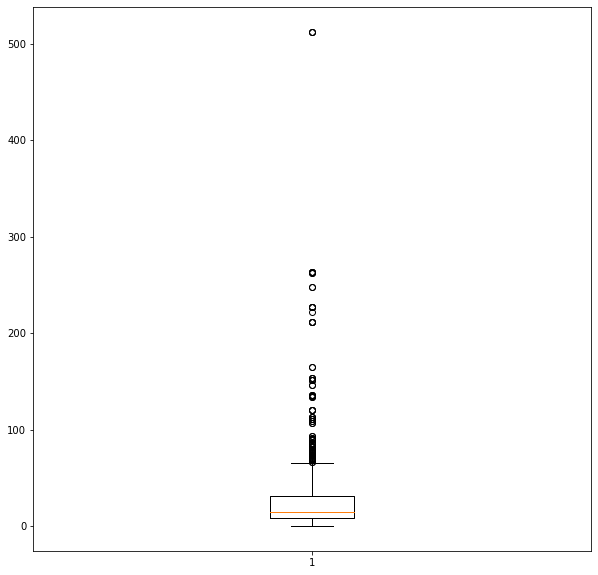

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(df.Fare)

Una **tabella di frequenza** di una variabile divide l'intervallo della variabile in segmenti equidistanti e ci dice quanti valori cadono in ciascun segmento.

In [13]:
# We cut the distribution in bucket
df['bins'] = pd.cut(df['Fare'], 10)

# We count how many times is frequent each bucket
a = df.groupby('bins').size()
a

bins
(-0.512, 51.233]      732
(51.233, 102.466]     106
(102.466, 153.699]     31
(153.699, 204.932]      2
(204.932, 256.165]     11
(256.165, 307.398]      6
(307.398, 358.63]       0
(358.63, 409.863]       0
(409.863, 461.096]      0
(461.096, 512.329]      3
dtype: int64

Un **istogramma** è un modo per visualizzare una tabella di frequenza, con i bin sull'asse x e il conteggio dei dati sull'asse y. <br>
Per la maggior parte dei set di dati, un istogramma creato dai dati sarà classificato come uno dei seguenti: <br>
- __Simmetrico__: un istogramma è simmetrico se ha un singolo picco e ha all'incirca lo stesso aspetto a sinistra del picco ea destra del picco.
- __Skewed right__ (*positivamente inclinato*): un istogramma è inclinato a destra (positivamente inclinato) se ha un singolo picco e i valori del set di dati si estendono molto più a destra del picco che a sinistra del picco .
- __Skewed left__ (*negativamente sbilanciato*): un istogramma è sbilanciato a sinistra (negativamente sbilanciato) se ha un singolo picco e i valori del set di dati si estendono molto più a sinistra del picco che a destra del picco .
- __Più picchi__: quando un istogramma mostra più picchi, in genere significa che i dati di due o più popolazioni vengono rappresentati graficamente insieme.

Skewness Distribution: 4.78


/opt/anaconda3/envs/jupyter/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


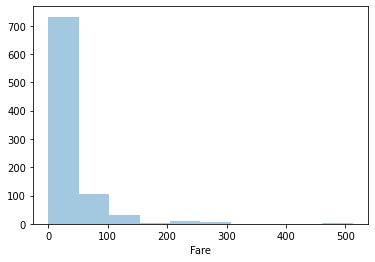

In [14]:
import seaborn as sns

dist = sns.distplot(df.Fare, bins=10, kde = False)
print("Skewness Distribution:", round(stats.skew(df.Fare),2))

Un **grafico della densità** può essere pensato come un istogramma smussato, sebbene in genere sia calcolato direttamente dai dati attraverso una stima della densità del kernel

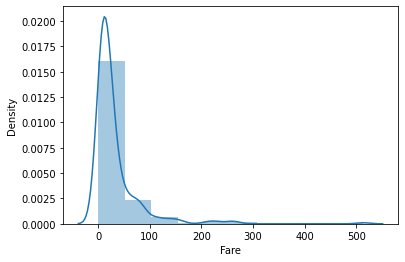

In [15]:
import seaborn as sns

hist_withf = sns.distplot(df.Fare, bins=10, kde = True)

<a id='expl_bin_cat'></a>
#### Esplorare dati binari e categorici

Per i dati categoriali, semplici proporzioni o percentuali raccontano la storia dei dati. <br>
- **Modalità**: la categoria o il valore più comune in un set di dati <br>
- **Valore atteso**: quando le categorie possono essere associate a un valore numerico, fornisce un valore medio basato sulla probabilità di accadimento di una categoria. <br>
- **Grafici a barre**: la frequenza o la proporzione per ciascuna categoria tracciata come barre <br>
- **Grafici a torta**: la frequenza o la proporzione per ciascuna categoria tracciata come spicchi in una torta.

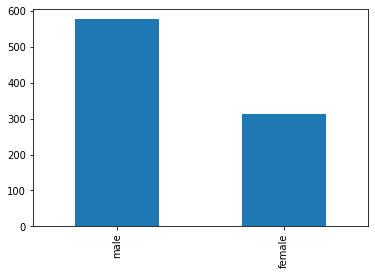

In [16]:
freq_table = df.Sex.value_counts()
xaxis = freq_table.index
value = freq_table.values

ax = freq_table.plot.bar(x=xaxis, y=value)

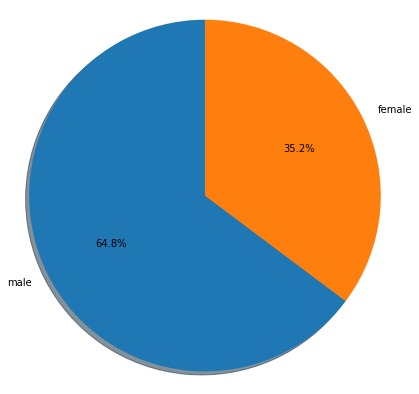

In [17]:
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<a id='correlation'></a>
#### Correlazione

Si dice che le variabili X e Y (ciascuna con dati misurati) siano **correlate positivamente** se valori alti di X vanno con valori alti di Y e valori bassi di X vanno con valori bassi di Y. Se valori alti di X vanno con valori bassi di Y, e viceversa, le variabili sono **correlate negativamente**. <br>
- **Coefficiente di correlazione**: metrica che misura la misura in cui le variabili numeriche sono associate tra loro (va da -1 a +1) <br>
- **Matrice di correlazione**: una tabella in cui le variabili sono visualizzate sia su righe che su colonne, e i valori di cella sono le correlazioni tra le variabili <br>
- **Scatterplot**: un grafico in cui l'asse x è il valore di una variabile e l'asse y il valore di un'altra

Il *coefficiente di correlazione*, che fornisce una stima della correlazione tra due variabili che giacciono sempre sulla stessa scala. Per calcolare il **coefficiente di correlazione di Pearson**, moltiplichiamo le deviazioni dalla media per la variabile 1 volte quelle per la variabile 2 e dividiamo per il prodotto delle deviazioni standard:
![Pearson](img/Pearson.png)
Il coefficiente di correlazione è sempre compreso tra +1 (*correlazione positiva perfetta*) e –1 (*correlazione negativa perfetta*); 0 indica nessuna correlazione.

In [18]:
print("Correlation Matrix:")
df.loc[:,['Pclass', 'Age','Fare']].corr()

Correlation Matrix:


,Pclass,Age,Fare
Pclass,1.000000,-0.369226,-0.549500
Age,-0.369226,1.000000,0.096067
Fare,-0.549500,0.096067,1.000000


Scatter plot between Fare and Passenger's Class


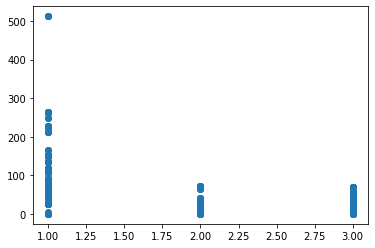

In [19]:
print("Scatter plot between Fare and Passenger's Class")
plt.scatter(df.Pclass, df.Fare)
plt.show()

Guardare i dati dalla matrice sopra può essere un po' noioso, tuttavia puoi aggirare questo problema visualizzando la matrice di correlazione da un grafico heatmap:

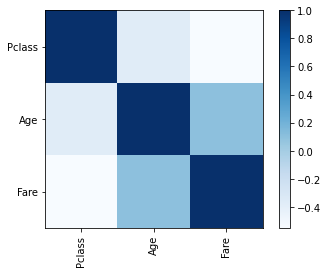

In [20]:
df_corr = df.loc[:,['Pclass', 'Age','Fare']]
plt.imshow(df_corr.corr(), cmap = plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df_corr.columns))]
plt.xticks(tick_marks, df_corr.columns, rotation='vertical')
plt.yticks(tick_marks, df_corr.columns)
plt.show()

<a id='expl_var'></a>
#### Esplorare due o più variabili

Stimatori familiari come media e varianza esaminano le variabili una alla volta (**analisi univariata**). L'analisi di correlazione è un metodo importante che confronta due variabili (**analisi bivariata**). <br>
In questa sezione esamineremo ulteriori stime e grafici e più di due variabili (**analisi multivariata**). <br>
- **Tabelle di contingenza**: un conteggio di conteggi tra due o più variabili categoriali <br>
- **Binning esagonale**: un grafico di due variabili numeriche con i record raggruppati in esagoni <br>
- **Grafici di contorno**: un grafico che mostra la densità di due variabili numeriche come una mappa topografica <br>
- **Violino**: simile a un boxplot ma che mostra la stima della densità

#### Plottare dati numerici vs dati numerici

*Scatterplots are fine when there is a __relatively small number of data values__*. <br>
For datasets with hundreds of thousands or millions of records, a scatterplot will be too dense, so we need a different way to visualize the relationship. <br>
For example with a <a href='https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hexbin.html'>Hexagonal binning</a>

In [3]:
fifa = pd.read_csv('data/data_fifa19.csv', index_col = 0)
fifa.head()
fifa_filter = fifa.loc[:,['Name', 'Age', 'Nationality', 'Position',
                          'Overall', 'Value', 'Wage', 'SprintSpeed', 'Acceleration']]

Scatter plot between Football player's Age and its Overall Score


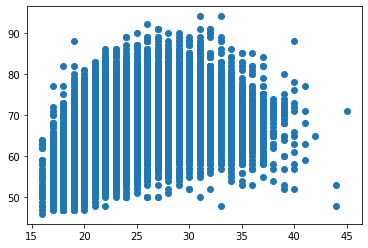

In [6]:
print("Scatter plot between Football player's Age and its Overall Score")
plt.scatter(fifa.Age, fifa.Overall)
plt.show()

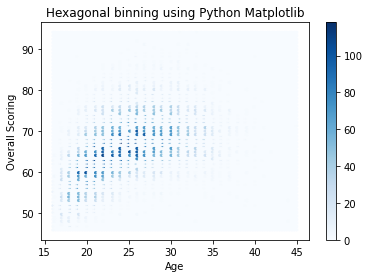

In [7]:
xData = fifa.Age
yData = fifa.Overall


# Plot the hexbin using the data genererated by numpy
plt.hexbin(xData, yData, gridsize=100, cmap='Blues')
plt.colorbar()
# Provide the title for the plot
plt.title('Hexagonal binning using Python Matplotlib')

# Give x axis label for the spike raster plot
plt.xlabel('Age')

# Give y axis label for the spike raster plot
plt.ylabel('Overall Scoring')

# Display the plot
plt.show()

Invece di tracciare punti, che apparirebbero come una nuvola scura monolitica, abbiamo raggruppato i record in contenitori esagonali e tracciati gli esagoni con un colore che indica il numero di record in quel contenitore.

Oppure possiamo usare il grafico <a href='https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html'>contours</a>. I contorni sono essenzialmente una mappa topografica a due variabili; ogni fascia di contorno rappresenta una specifica densità di punti, aumentando man mano che ci si avvicina a un *picco*. <br>
L'*intervallo di contorno* di una mappa di contorno è la differenza di elevazione tra le curve di livello successive. <br>
Più in generale, una *linea di contorno* per una funzione di due variabili è una curva che collega punti in cui la funzione ha lo stesso valore particolare.
![Contour](img/contour.png)

[-6, -4, -2, 0, 2, 4, 6]
[-6, -4, -2, 0, 2, 4, 6]
[[72. 52. 40. 36. 40. 52. 72.]
 [52. 32. 20. 16. 20. 32. 52.]
 [40. 20.  8.  4.  8. 20. 40.]
 [36. 16.  4.  0.  4. 16. 36.]
 [40. 20.  8.  4.  8. 20. 40.]
 [52. 32. 20. 16. 20. 32. 52.]
 [72. 52. 40. 36. 40. 52. 72.]]


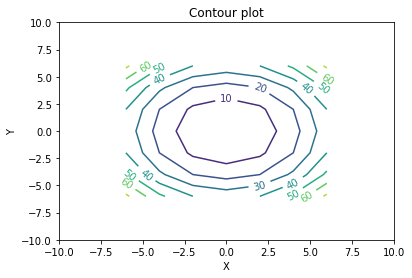

In [8]:
import numpy as np
import matplotlib.pyplot as plot
import pylab

# List of points in x axis
XPoints     = []

# List of points in y axis
YPoints     = []

# X and Y points are from -6 to +6 varying in steps of 2 
for val in range(-6, 8, 2):
    XPoints.append(val)
    YPoints.append(val)

# Z values as a matrix
ZPoints     = np.ndarray((7,7))

# Populate Z Values (a 7x7 matrix) - For a circle x^2+y^2=z    
for x in range(0, len(XPoints)):
    for y in range(0, len(YPoints)):
        ZPoints[x][y] = (XPoints[x]* XPoints[x]) + (YPoints[y]*YPoints[y])

# Print x,y and z values
print(XPoints)
print(YPoints)
print(ZPoints)

# Set the x axis and y axis limits
pylab.xlim([-10,10])
pylab.ylim([-10,10])

# Provide a title for the contour plot
plot.title('Contour plot')

# Set x axis label for the contour plot
plot.xlabel('X')

# Set y axis label for the contour plot
plot.ylabel('Y')

# Create contour lines or level curves using matplotlib.pyplot module
contours = plot.contour(XPoints, YPoints, ZPoints)

# Display z values on contour lines
plot.clabel(contours, inline=1, fontsize=10)

# Display the contour plot
plot.show()

[-6, -4, -2, 0, 2, 4, 6]
[-6, -4, -2, 0, 2, 4, 6]
[[72. 52. 40. 36. 40. 52. 72.]
 [52. 32. 20. 16. 20. 32. 52.]
 [40. 20.  8.  4.  8. 20. 40.]
 [36. 36. 36. 36. 36. 36. 36.]
 [40. 20.  8.  4.  8. 20. 40.]
 [52. 32. 20. 16. 20. 32. 52.]
 [72. 52. 40. 36. 40. 52. 72.]]


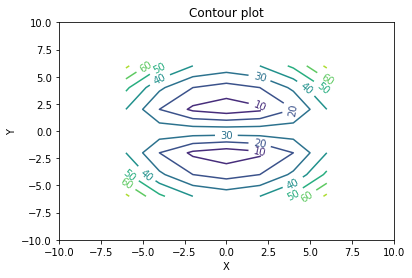

In [9]:
# Try to change ZPoints for understanding the changes in the chart
ZPoints[:][3] = [36,36,36,36,36,36,36]

# Print x,y and z values
print(XPoints)
print(YPoints)
print(ZPoints)

# Set the x axis and y axis limits
pylab.xlim([-10,10])
pylab.ylim([-10,10])

# Provide a title for the contour plot
plot.title('Contour plot')

# Set x axis label for the contour plot
plot.xlabel('X')

# Set y axis label for the contour plot
plot.ylabel('Y')

# Create contour lines or level curves using matplotlib.pyplot module
contours = plot.contour(XPoints, YPoints, ZPoints)

# Display z values on contour lines
plot.clabel(contours, inline=1, fontsize=10)

# Display the contour plot
plot.show()

#### Due variabili categoriche

Un modo utile per riassumere due variabili categoriali è una **tabella di contingenza**, una tabella di conteggi per categoria.

In [10]:
pd.crosstab(fifa.Position, fifa['Preferred Foot']).head()

Preferred Foot,Left,Right
Position,,
CAM,256,702
CB,341,1437
CDM,126,822
CF,18,56
CM,249,1145


In [27]:
pd.crosstab(fifa.Position, fifa['Preferred Foot'], normalize='index').head()

Preferred Foot,Left,Right
Position,,
CAM,0.267223,0.732777
CB,0.191789,0.808211
CDM,0.132911,0.867089
CF,0.243243,0.756757
CM,0.178623,0.821377


###### Categorical and Numeric Data

I boxplot sono un modo semplice per confrontare visivamente *le distribuzioni di una variabile numerica raggruppate in base a una variabile categoriale*.

Nella tabella seguente confrontiamo la distribuzione dei punteggi complessivi raggruppati in base alla posizione del calciatore.

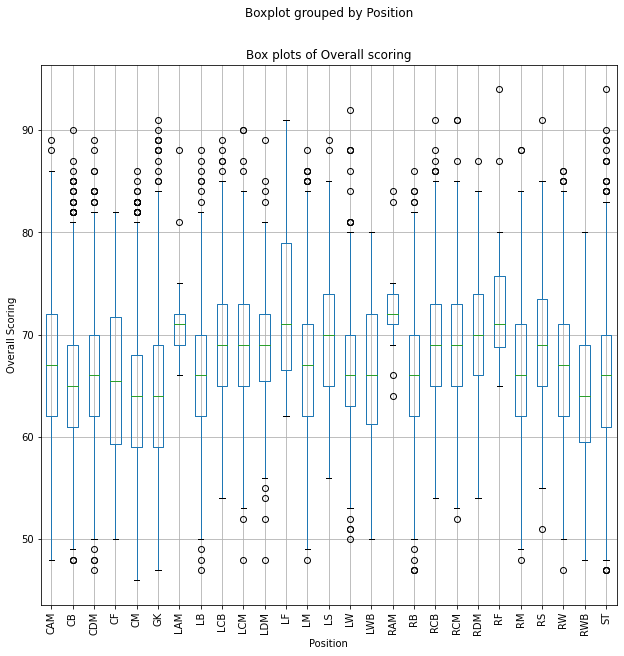

In [28]:
fifa_filter = fifa.loc[:,['Name', 'Age', 'Nationality', 'Position',
                          'Overall', 'Value', 'Wage', 'SprintSpeed', 'Acceleration']]

fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
fifa_filter[['Overall','Position']].boxplot(by = 'Position', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of Overall scoring') # Give the plot a main title
ax.set_xlabel('Position') # Set text for the x axis
ax.set_ylabel('Overall Scoring')# Set text for y axis
plt.xticks(rotation='vertical')
plt.show()

È possibile notare che RAM è la posizione con il punteggio complessivo mediano più alto.

Un **grafico violino** è un miglioramento del boxplot e traccia **la stima della densità sull'asse y**. <br>
La densità viene riflessa e capovolta e la forma risultante viene riempita, creando un'immagine simile a un violino.
<br>
Il vantaggio di un diagramma di violino è che può mostrare sfumature nella distribuzione che non sono percepibili in un diagramma a scatole, poiché mostra la densità di probabilità dei dati a valori diversi, solitamente attenuati da uno stimatore di densità del kernel.

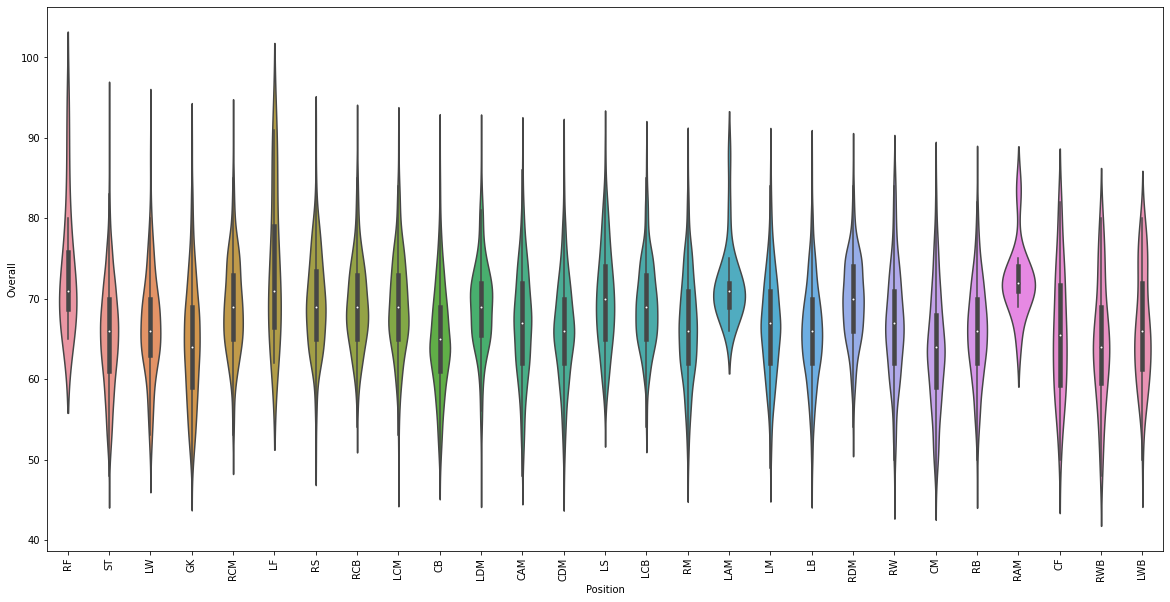

In [29]:
import seaborn as sns

fig, ax = plt.subplots(figsize =(20, 10)) 
sns.violinplot(ax = ax, x = fifa_filter['Position'], y=fifa_filter['Overall'] ) 
plt.xticks(rotation='vertical')
plt.show()

/opt/anaconda3/envs/jupyter/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


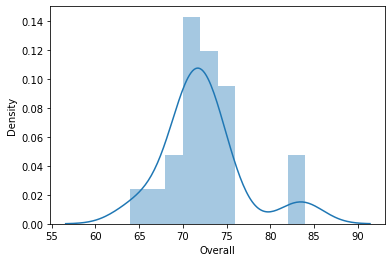

In [30]:
subsample = fifa_filter.loc[fifa_filter['Position']=='RAM', 'Overall']
plt = sns.distplot(subsample, bins=10, kde = True)

###### Visualizing Multiple Variables

I tipi di grafici utilizzati per confrontare due variabili - grafici a dispersione, binning esagonale e boxplot - sono prontamente estesi a più variabili attraverso la nozione di *condizionamento*. <br>

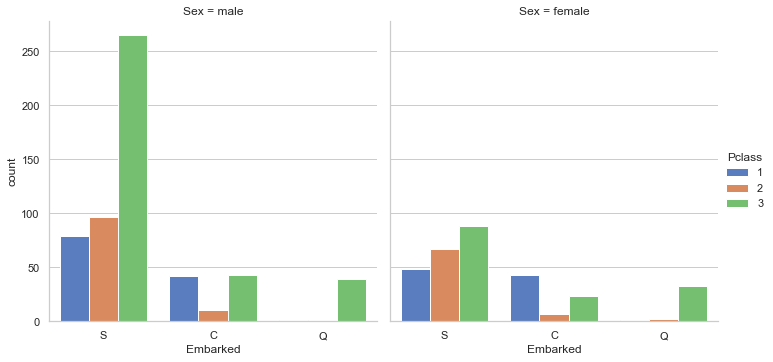

In [31]:
# Draw a nested barplot to show embarked for class and sex
sns.set(style="whitegrid")

g = sns.catplot(x="Embarked", hue="Pclass", col="Sex", kind="count", data=df, palette="muted")

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>